In [1]:
import json

with open("/proj/mechanistic.shadow/mrofin/tinylinguist/data/discriminator_accuracy.json", "r") as f:
    discriminator_accs = json.load(f)

In [2]:
with open("/proj/mechanistic.shadow/mrofin/tinylinguist/data/val_results_2.json", "r") as f:
    val_results = json.load(f)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", palette="Dark2")

In [4]:
import pandas as pd

df = pd.DataFrame(val_results)
df2 = pd.DataFrame(discriminator_accs)

In [5]:
df = df.sort_values(by=["step", "layer"], ignore_index=True)
df2 = df2.sort_values(by=["step"], ignore_index=True)

In [6]:
df.head()

,step,layer,tc_acc,td_mse,sl_mse
0,0,2,0.7250,0.866893,6.826124
1,0,4,0.7582,0.915059,7.552735
2,0,6,0.7788,0.953936,7.786419
3,0,8,0.8060,0.971391,7.955232
4,200,2,0.7798,0.648532,3.551220


In [7]:
df2.head()

,step,accuracy
0,0,0.9980
1,200,0.9120
2,400,0.7805
3,600,0.7415
4,800,0.7360


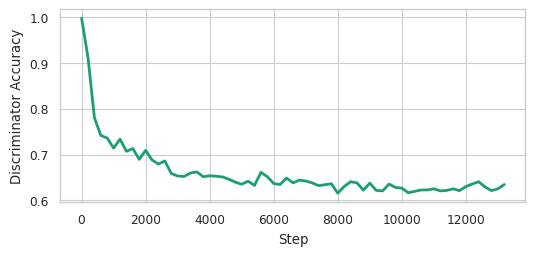

In [13]:
plt.figure(figsize=(6, 2.5))
sns.lineplot(data=df2, x="step", y="accuracy", linewidth=2)
plt.ylabel("Discriminator Accuracy")
plt.xlabel("Step")
plt.savefig("img/discriminator_accuracy.pdf", bbox_inches="tight");

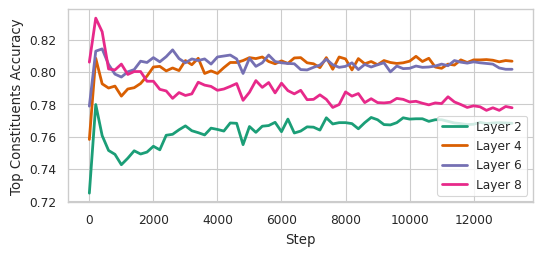

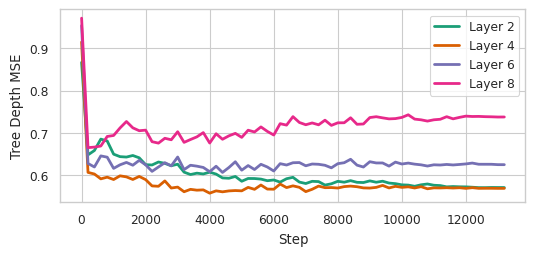

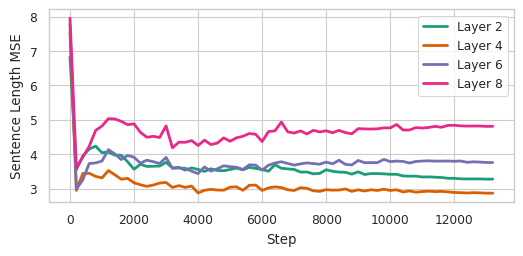

In [18]:
d = {
    "tc_acc": "Top Constituents Accuracy",
    "td_mse": "Tree Depth MSE",
    "sl_mse": "Sentence Length MSE"
}

for col in ['tc_acc', 'td_mse', 'sl_mse']:
    plt.figure(figsize=(6, 2.5))
    for layer in [2, 4, 6, 8]:
        sns.lineplot(x="step", y=col, data=df[df["layer"] == layer], label=f"Layer {layer}", linewidth=2)

    plt.xlabel("Step")
    plt.ylabel(d[col])
    plt.savefig(f"img/{col}.pdf", bbox_inches="tight")
    plt.show()